# PMD ARIMA 

**A time series is constant only if its data is centered around its mean or if its variance is constant!!**

    This package helps us to determine the different values that can be used in the difference function.
    3 parameters mainly : auto regressive (p) ,  Integrated (d) , Moving Avg.(q)
    

In [6]:
from pandas_datareader import data
import numpy as np
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime
import plotly.express as px

import pmdarima as pm
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss, adfuller

mat.rcParams['figure.figsize'] = (10,8)
mat.rcParams['axes.grid'] = False

In [8]:
start_date = '2010-11-21'
end_date = '2020-11-21'

df = data.DataReader('GOOG', 'yahoo', start_date, end_date)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-11-22,295.611969,290.286926,292.638123,294.506134,4389592.0,294.506134
2010-11-23,293.405243,288.020416,292.408966,290.416443,4341412.0,290.416443
2010-11-24,297.186066,292.428894,292.558411,296.374115,4810765.0,296.374115
2010-11-26,295.382843,292.403992,294.127533,293.898407,2632029.0,293.898407
2010-11-29,293.798767,288.892151,293.484955,289.968140,5740838.0,289.968140
...,...,...,...,...,...,...
2020-11-16,1799.069946,1767.689941,1771.699951,1781.380005,1246800.0,1781.380005
2020-11-17,1785.000000,1767.000000,1776.939941,1770.150024,1147100.0,1770.150024
2020-11-18,1773.469971,1746.140015,1765.229980,1746.780029,1173500.0,1746.780029


<AxesSubplot:xlabel='Date'>

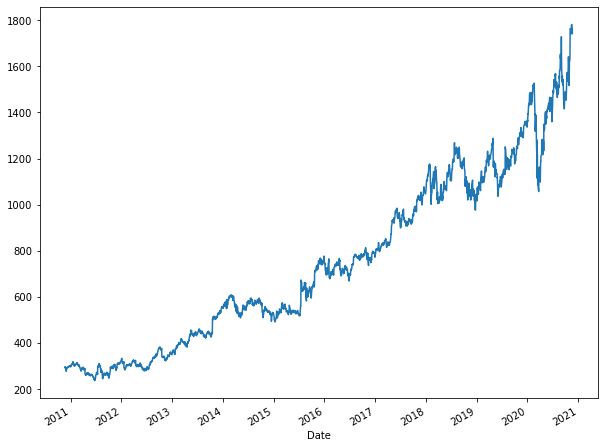

In [10]:
df['Close'].plot()

# Test whether the data is stationary or non-stationary 

    Null Hypothesis - Series possesses a unit root and hence is non-stationary
    Alternate Hypothesis - Series is Stationary

In [11]:
result = adfuller(df['Close'])
print('Test Statistics : ', result[0])
print('p-value : ', result[1])
print('Critical Values : ', result[4])

Test Statistics :  0.8799813275776561
p-value :  0.9928234363554097
Critical Values :  {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}


In [14]:
if result[1] > 0.05:
    print('accept null hypo. Data is non-stationary')
else:
    print('data is stationary')

accept null hypo. Data is non-stationary


# Now our data is non-stationary ... we need to make it stationary

    1st order differencing : take [t - (t-1)]
    2nd order differencing : take [t - (t-1)] - [t-1 - (t-2)]

In [16]:
pm.arima.ndiffs(df['Close'], alpha=0.05, test='kpss', max_d=4) # YOU CAN APPLY ADF TEST HERE ALSO

1

<AxesSubplot:xlabel='Date'>

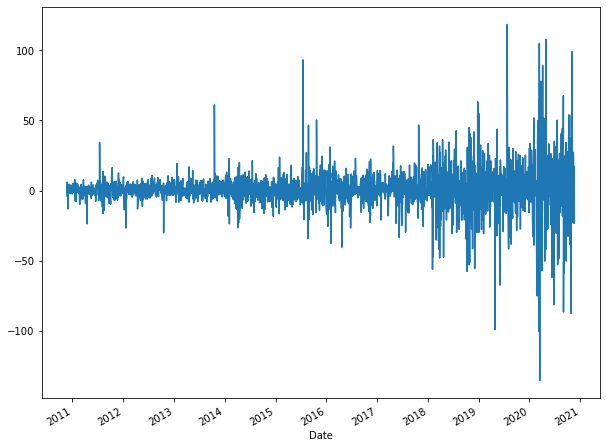

In [18]:
lag_good= df['Close'].rolling(window=2).apply(lambda x: x[1]- x[0]).dropna()
lag_good.plot()

## Confirm it by again running the tests!!

In [19]:
pm.arima.ndiffs(lag_good, alpha=0.05, test='kpss', max_d=4) # YOU CAN APPLY ADF TEST HERE ALSO

0

In [20]:
result = adfuller(lag_good)
print('Test Statistics : ', result[0])
print('p-value : ', result[1])
print('Critical Values : ', result[4])

Test Statistics :  -9.987195057608297
p-value :  2.0406386796025066e-17
Critical Values :  {'1%': -3.4329789374204935, '5%': -2.8627014485379787, '10%': -2.5673882843825098}


In [21]:
if result[1] > 0.05:
    print('accept null hypo. Data is non-stationary')
else:
    print('data is stationary')

data is stationary


# NYC Energy Consumption Dataset

In [33]:
dfe = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
dfe

,timeStamp,demand,precip,temp
0,2012-01-01 00:00:00,4937.5,0.0000,46.13
1,2012-01-01 01:00:00,4752.1,0.0000,45.89
2,2012-01-01 02:00:00,4542.6,0.0000,45.04
3,2012-01-01 03:00:00,4357.7,0.0000,45.03
4,2012-01-01 04:00:00,4275.5,0.0000,42.61
...,...,...,...,...
49200,2017-08-12 02:00:00,NaN,0.0000,70.84
49201,2017-08-12 03:00:00,NaN,0.0000,70.57
49202,2017-08-12 04:00:00,NaN,0.0000,69.89
49203,2017-08-12 05:00:00,NaN,0.0000,68.59


<AxesSubplot:>

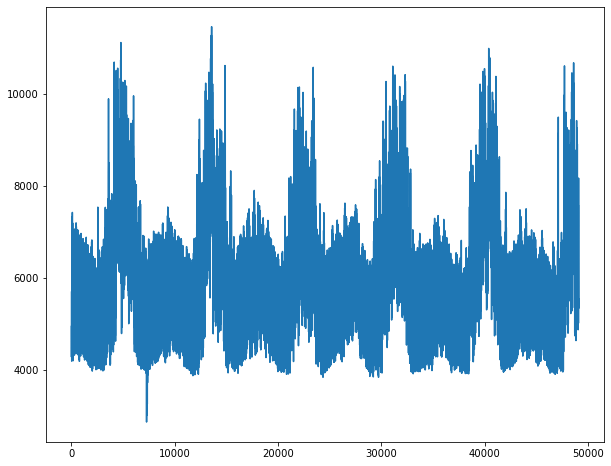

In [34]:
dfe['demand'].plot()

In [35]:
dfe.isnull().sum()

timeStamp      0
demand        81
precip       230
temp         186
dtype: int64

# Your Time Series data should not be having any null values while doing these tests!!!! 

In [36]:
dfe = dfe.fillna(method='ffill')

In [37]:
dfe.isnull().sum()

timeStamp    0
demand       0
precip       0
temp         0
dtype: int64

In [38]:
dfe['timeStamp'] = pd.to_datetime(dfe['timeStamp'], infer_datetime_format=True)
dfe = dfe.set_index('timeStamp')

In [39]:
dfe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 49205 entries, 2012-01-01 00:00:00 to 2017-08-12 06:00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   demand  49205 non-null  float64
 1   precip  49205 non-null  float64
 2   temp    49205 non-null  float64
dtypes: float64(3)
memory usage: 1.5 MB


array([<AxesSubplot:xlabel='timeStamp'>, <AxesSubplot:xlabel='timeStamp'>,
       <AxesSubplot:xlabel='timeStamp'>], dtype=object)

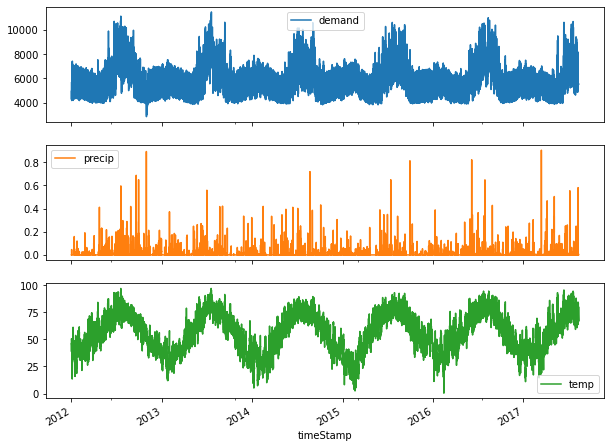

In [41]:
dfe.plot(subplots=True)

# Theoritically check if the data is stationary or not by running the kpss test

    Null Hypo : Series is Stationary
    Alternate Hypo : Series is non-stationary

In [46]:
# NOTE : Here we reversed it bcoz here we are mainly doing it for the alternate hypothesis

stats, p, lags, critical_values = kpss(dfe['temp'])
print('Test Statistics : ', stats)
print('p-value : ', p)
print('Critical values : ', critical_values)



Test Statistics :  0.987647074929233
p-value :  0.01
Critical values :  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [47]:
if p < 0.05:
    print('accept the null hypo ... Series is non stationary')
else:
    print('series is stationary')

accept the null hypo ... Series is non stationary


# Seasonal Differencing

    Previously we did simple differencing but here the data has seasonality so we need to do the seasonal differencing
    and season can be month , year, hour or any.
    y't = yt - (yt-m)
    
    Here its an hourly data and it is having 24 data points a day so 365 days per year = 8760 hours

In [48]:
24*365

8760

In [51]:
lag_temp = dfe['temp'].rolling(window=8760).apply(lambda x : x.iloc[8759] - x.iloc[0]).dropna()

<AxesSubplot:xlabel='timeStamp'>

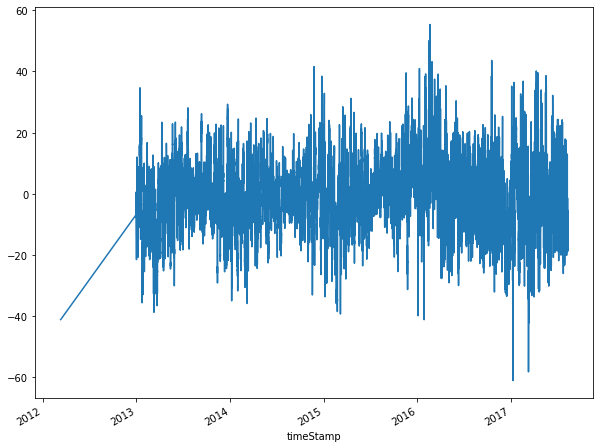

In [52]:
lag_temp.plot()

# KPSS test
    Null Hypo : Series is Stationary
    Alternate Hypo : Series is non stationary

In [57]:
# NOTE : Here we reversed it bcoz here we are mainly doing it for the alternate hypothesis

stats, p, lags, critical_values = kpss(lag_temp)
print('Test Statistics : ', stats)
print('p-value : ', p)
print('Critical values : ', critical_values)

Test Statistics :  1.708759384276412
p-value :  0.01
Critical values :  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}


In [58]:
if p < 0.05:
    print('accept the null hypo ... Series is non stationary')
else:
    print('series is stationary')

accept the null hypo ... Series is non stationary


## Its still non stationary so we need to check excatly how many differencing we need to do

In [61]:
pm.arima.ndiffs(lag_temp, test='kpss', max_d=5)

1

## Now again after applying the seasonal differencing again apply the normal differencing

<AxesSubplot:xlabel='timeStamp'>

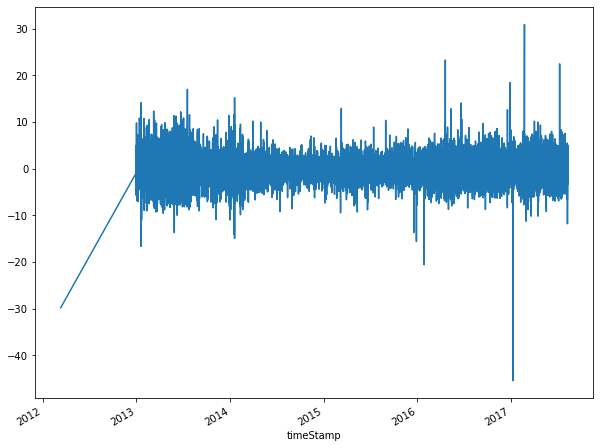

In [62]:
lag_temp.rolling(window=2).apply(lambda x : x[1] - x[0]).dropna().plot()

In [63]:
lag_temp_diff = lag_temp.rolling(window=2).apply(lambda x : x[1] - x[0]).dropna()

In [65]:
# NOTE : Here we reversed it bcoz here we are mainly doing it for the alternate hypothesis

stats, p, lags, critical_values = kpss(lag_temp_diff)
print('Test Statistics : ', stats)
print('p-value : ', p)
print('Critical values : ', critical_values)

if p < 0.05:
    print('accept the null hypo ... Series is non stationary')
else:
    print('series is stationary')

Test Statistics :  0.0014461900667549446
p-value :  0.1
Critical values :  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
series is stationary


## Now the data is stationary!!
    
    So if you are feeding the data into an ARIMA model then you dont have to make the data stationary. Simply take the 
    difference parameter (in this case we got 1 ) then feed as the D parameter in the ARIMA 
    but while using AR or MA model separately then you need to make the data stationary!!
    